In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import numpy as np

In [2]:
df = pd.read_csv("results_alitzel_data_experiment1.csv")

In [3]:
N = len(os.listdir("./networks/"))

In [4]:
data = np.zeros((N,N))

In [5]:
keys = [s.split('.')[0] for s in os.listdir("./networks/")]
keys = sorted(["_".join([s.split('_')[1],s.split('_')[0]]) for s in keys])

In [6]:
print(keys)

['fitch_K00135', 'fitch_K00161', 'fitch_K00162', 'fitch_K00164', 'fitch_K00228', 'fitch_K00254', 'fitch_K00262', 'fitch_K00573', 'fitch_K00627', 'fitch_K00632', 'fitch_K01011', 'fitch_K01255', 'fitch_K01419', 'fitch_K01493', 'fitch_K01589', 'fitch_K01638', 'fitch_K01669', 'fitch_K01724', 'fitch_K01772', 'fitch_K01903', 'fitch_K02221', 'fitch_K02257', 'fitch_K02259', 'fitch_K02274', 'fitch_K02275', 'fitch_K02276', 'fitch_K02823', 'fitch_K03074', 'fitch_K03179', 'fitch_K03635', 'fitch_K03636', 'fitch_K03667', 'fitch_K03737', 'fitch_K03820', 'fitch_K03980', 'fitch_K04068', 'fitch_K06886', 'fitch_K06980', 'fitch_K07133', 'fitch_K07146', 'fitch_K07152', 'fitch_K08303', 'fitch_K13628', 'fitch_K17828', 'fitch_K21636', 'genesis_K00135', 'genesis_K00161', 'genesis_K00162', 'genesis_K00164', 'genesis_K00228', 'genesis_K00254', 'genesis_K00262', 'genesis_K00573', 'genesis_K00627', 'genesis_K00632', 'genesis_K01011', 'genesis_K01255', 'genesis_K01419', 'genesis_K01493', 'genesis_K01589', 'genesis_

In [7]:
results_dict = {}

In [8]:
for row in df.itertuples(): 
    fname1 = row.fname1.split('.')[0]
    fname1 = "_".join([fname1.split('_')[1],fname1.split('_')[0]])

    fname2 = row.fname2.split('.')[0]
    fname2 = "_".join([fname2.split('_')[1],fname2.split('_')[0]])

    results_dict[(fname1,fname2)] = int(row.distance)

In [9]:
for k1, fname1 in enumerate(keys):
    for k2, fname2 in enumerate(keys):
        data[k1,k2] = results_dict[(fname1,fname2)]

132


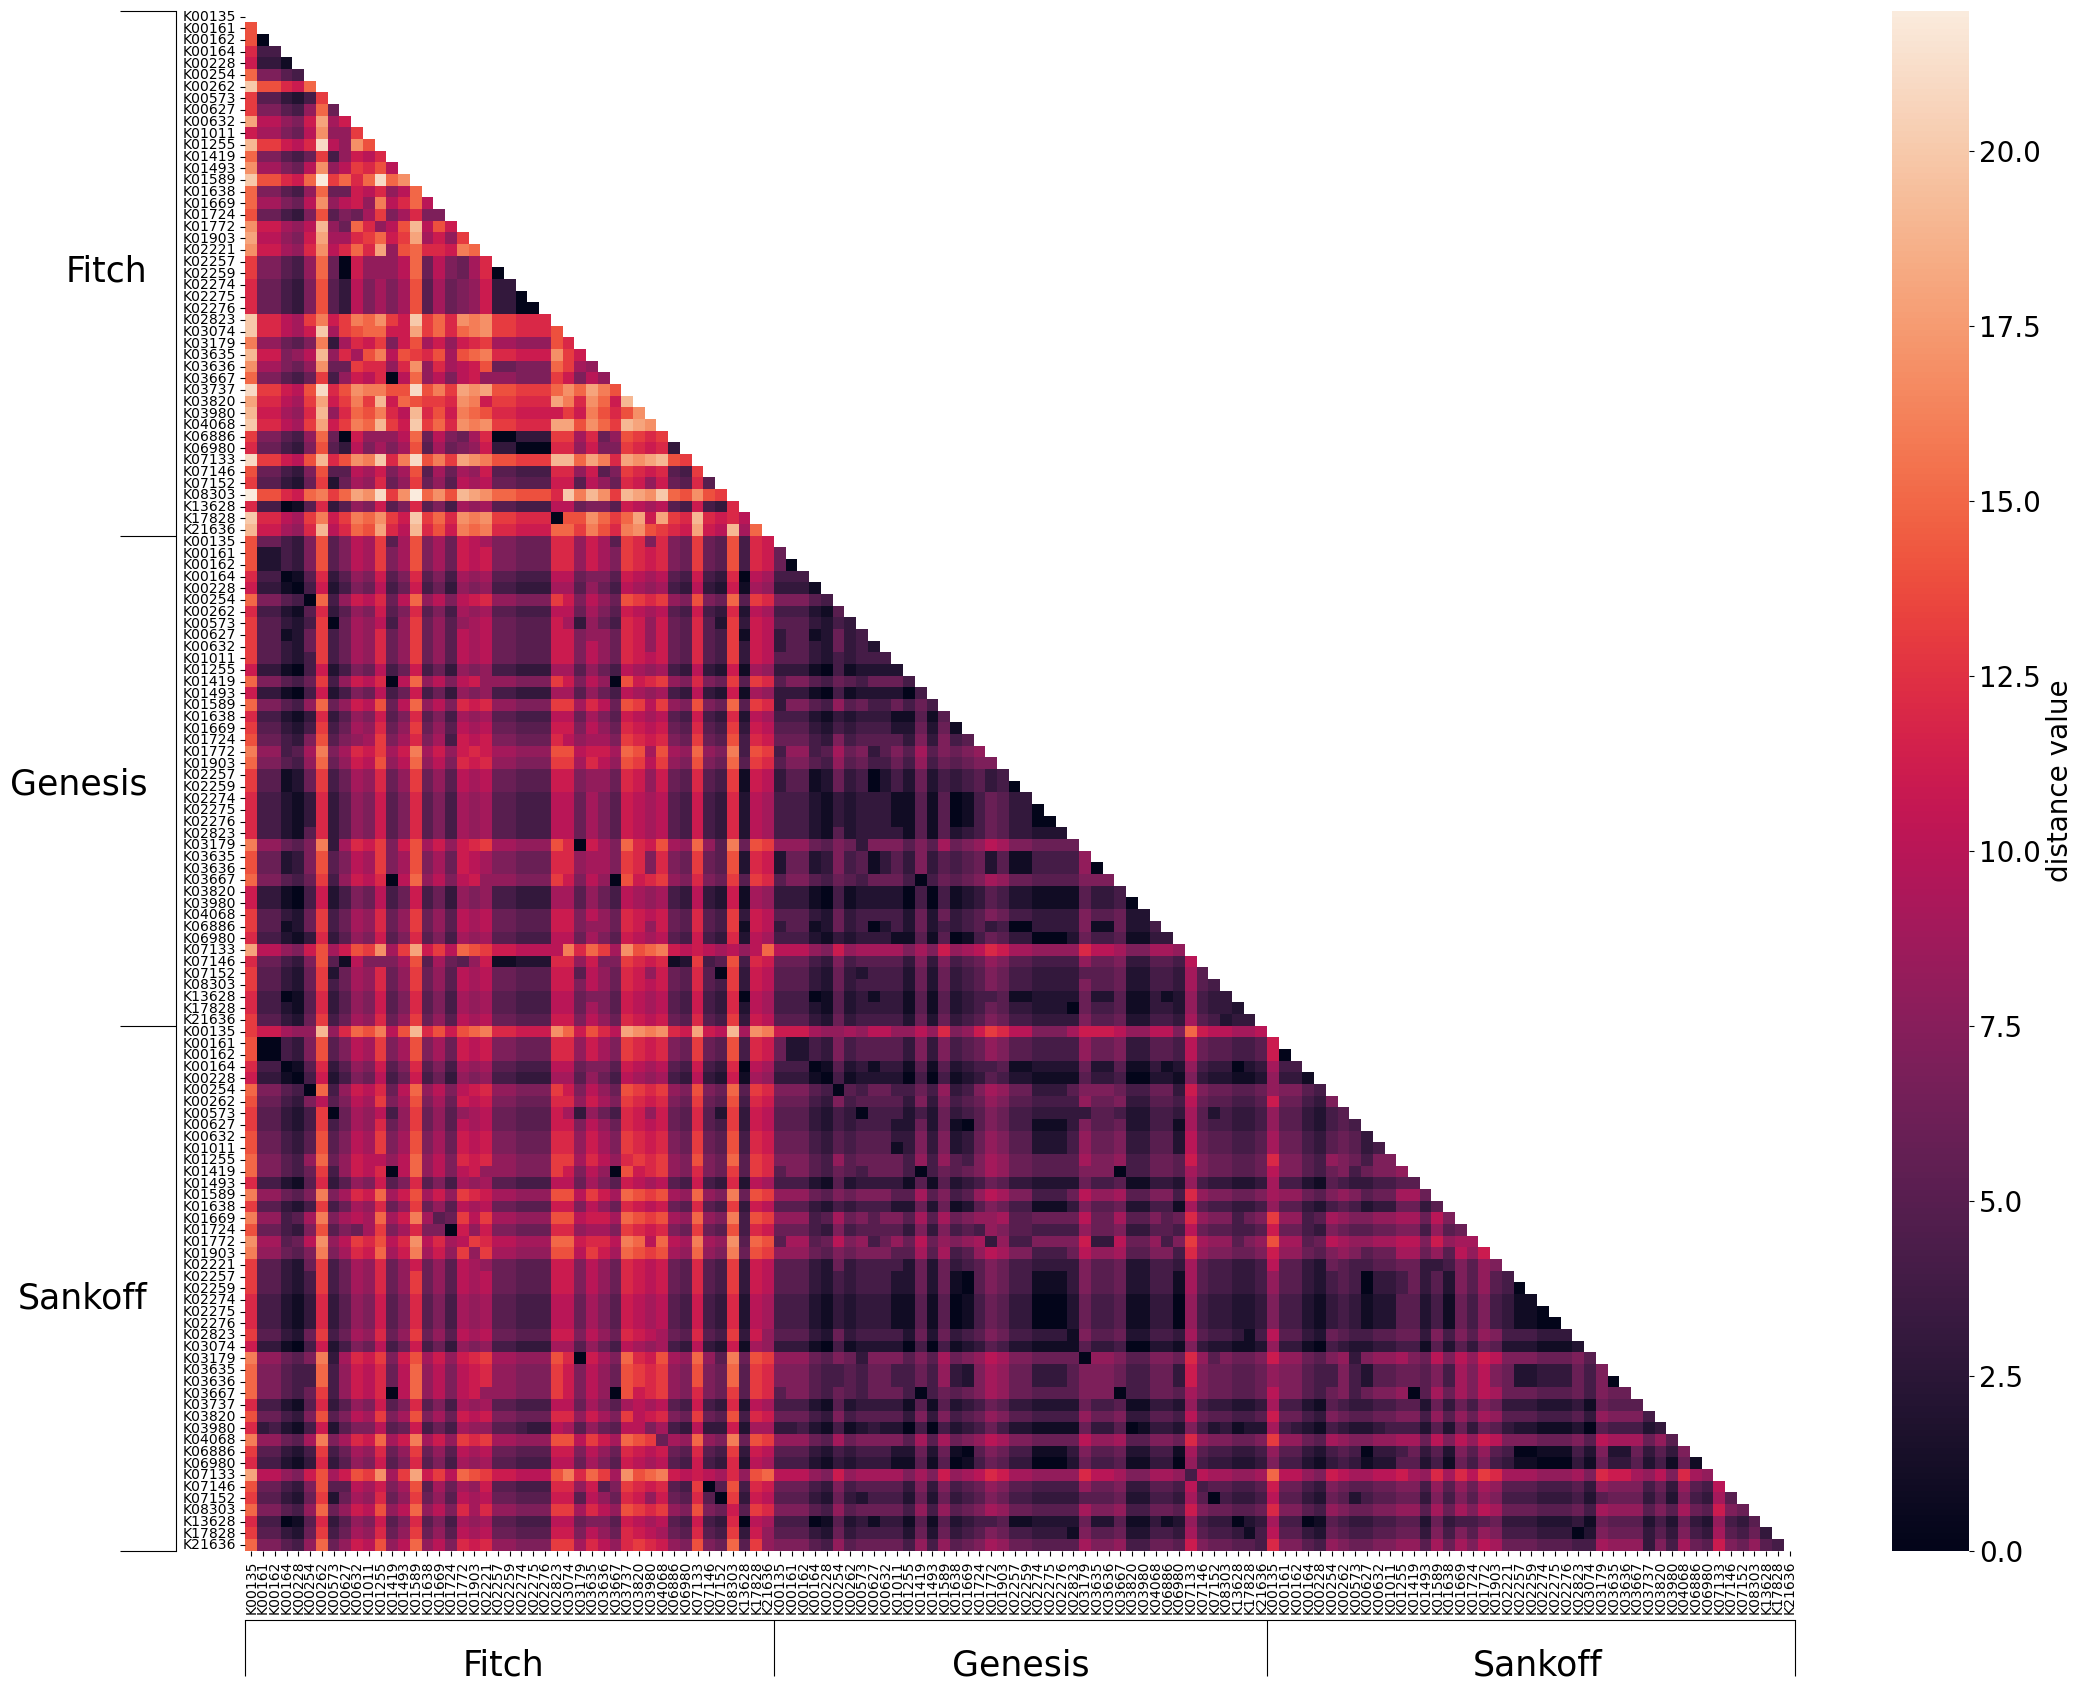

In [26]:
print(len(keys))
new_keys = [key.split("_")[1] for key in keys]
fig, ax = plt.subplots(figsize=(25,20))
mask = np.triu(np.ones_like(data, dtype=bool))
ax = sns.heatmap(data,xticklabels=new_keys,yticklabels=new_keys,cbar_kws={"label":"distance value"},mask=mask)
# Get the colorbar axes
cbar_axes = ax.figure.axes[-1]

sec = ax.secondary_yaxis(location=-.06)
sec.spines['left'].set_visible(False)
sec.set_yticks([22,66,110],labels=['Fitch','Genesis','Sankoff'],fontsize=25)
sec.tick_params('y',length=0)

sec2 = ax.secondary_yaxis(location=-.045)
sec2.set_yticks([0,45,87,132],labels=[])
sec2.tick_params('y',length=40)

sec3 = ax.secondary_xaxis(location=-.06)
sec3.spines['bottom'].set_visible(False)
sec3.set_xticks([22,66,110],labels=['Fitch','Genesis','Sankoff'],fontsize=25)
sec3.tick_params('x',length=0)

sec4 = ax.secondary_xaxis(location=-.045)
sec4.set_xticks([0,45,87,132],labels=[])
sec4.tick_params('x',length=40)

# Set the font size for colorbar tick labels
cbar_axes.tick_params(labelsize=20)

# Set the font size for the colorbar label
cbar_axes.yaxis.label.set_size(20)
fig.savefig("figure_character_reconstruction.pdf")

In [30]:
keys = sorted(keys, key=lambda x : x.split("_")[1])
for k1, fname1 in enumerate(keys):
    for k2, fname2 in enumerate(keys):
        data[k1,k2] = results_dict[(fname1,fname2)]

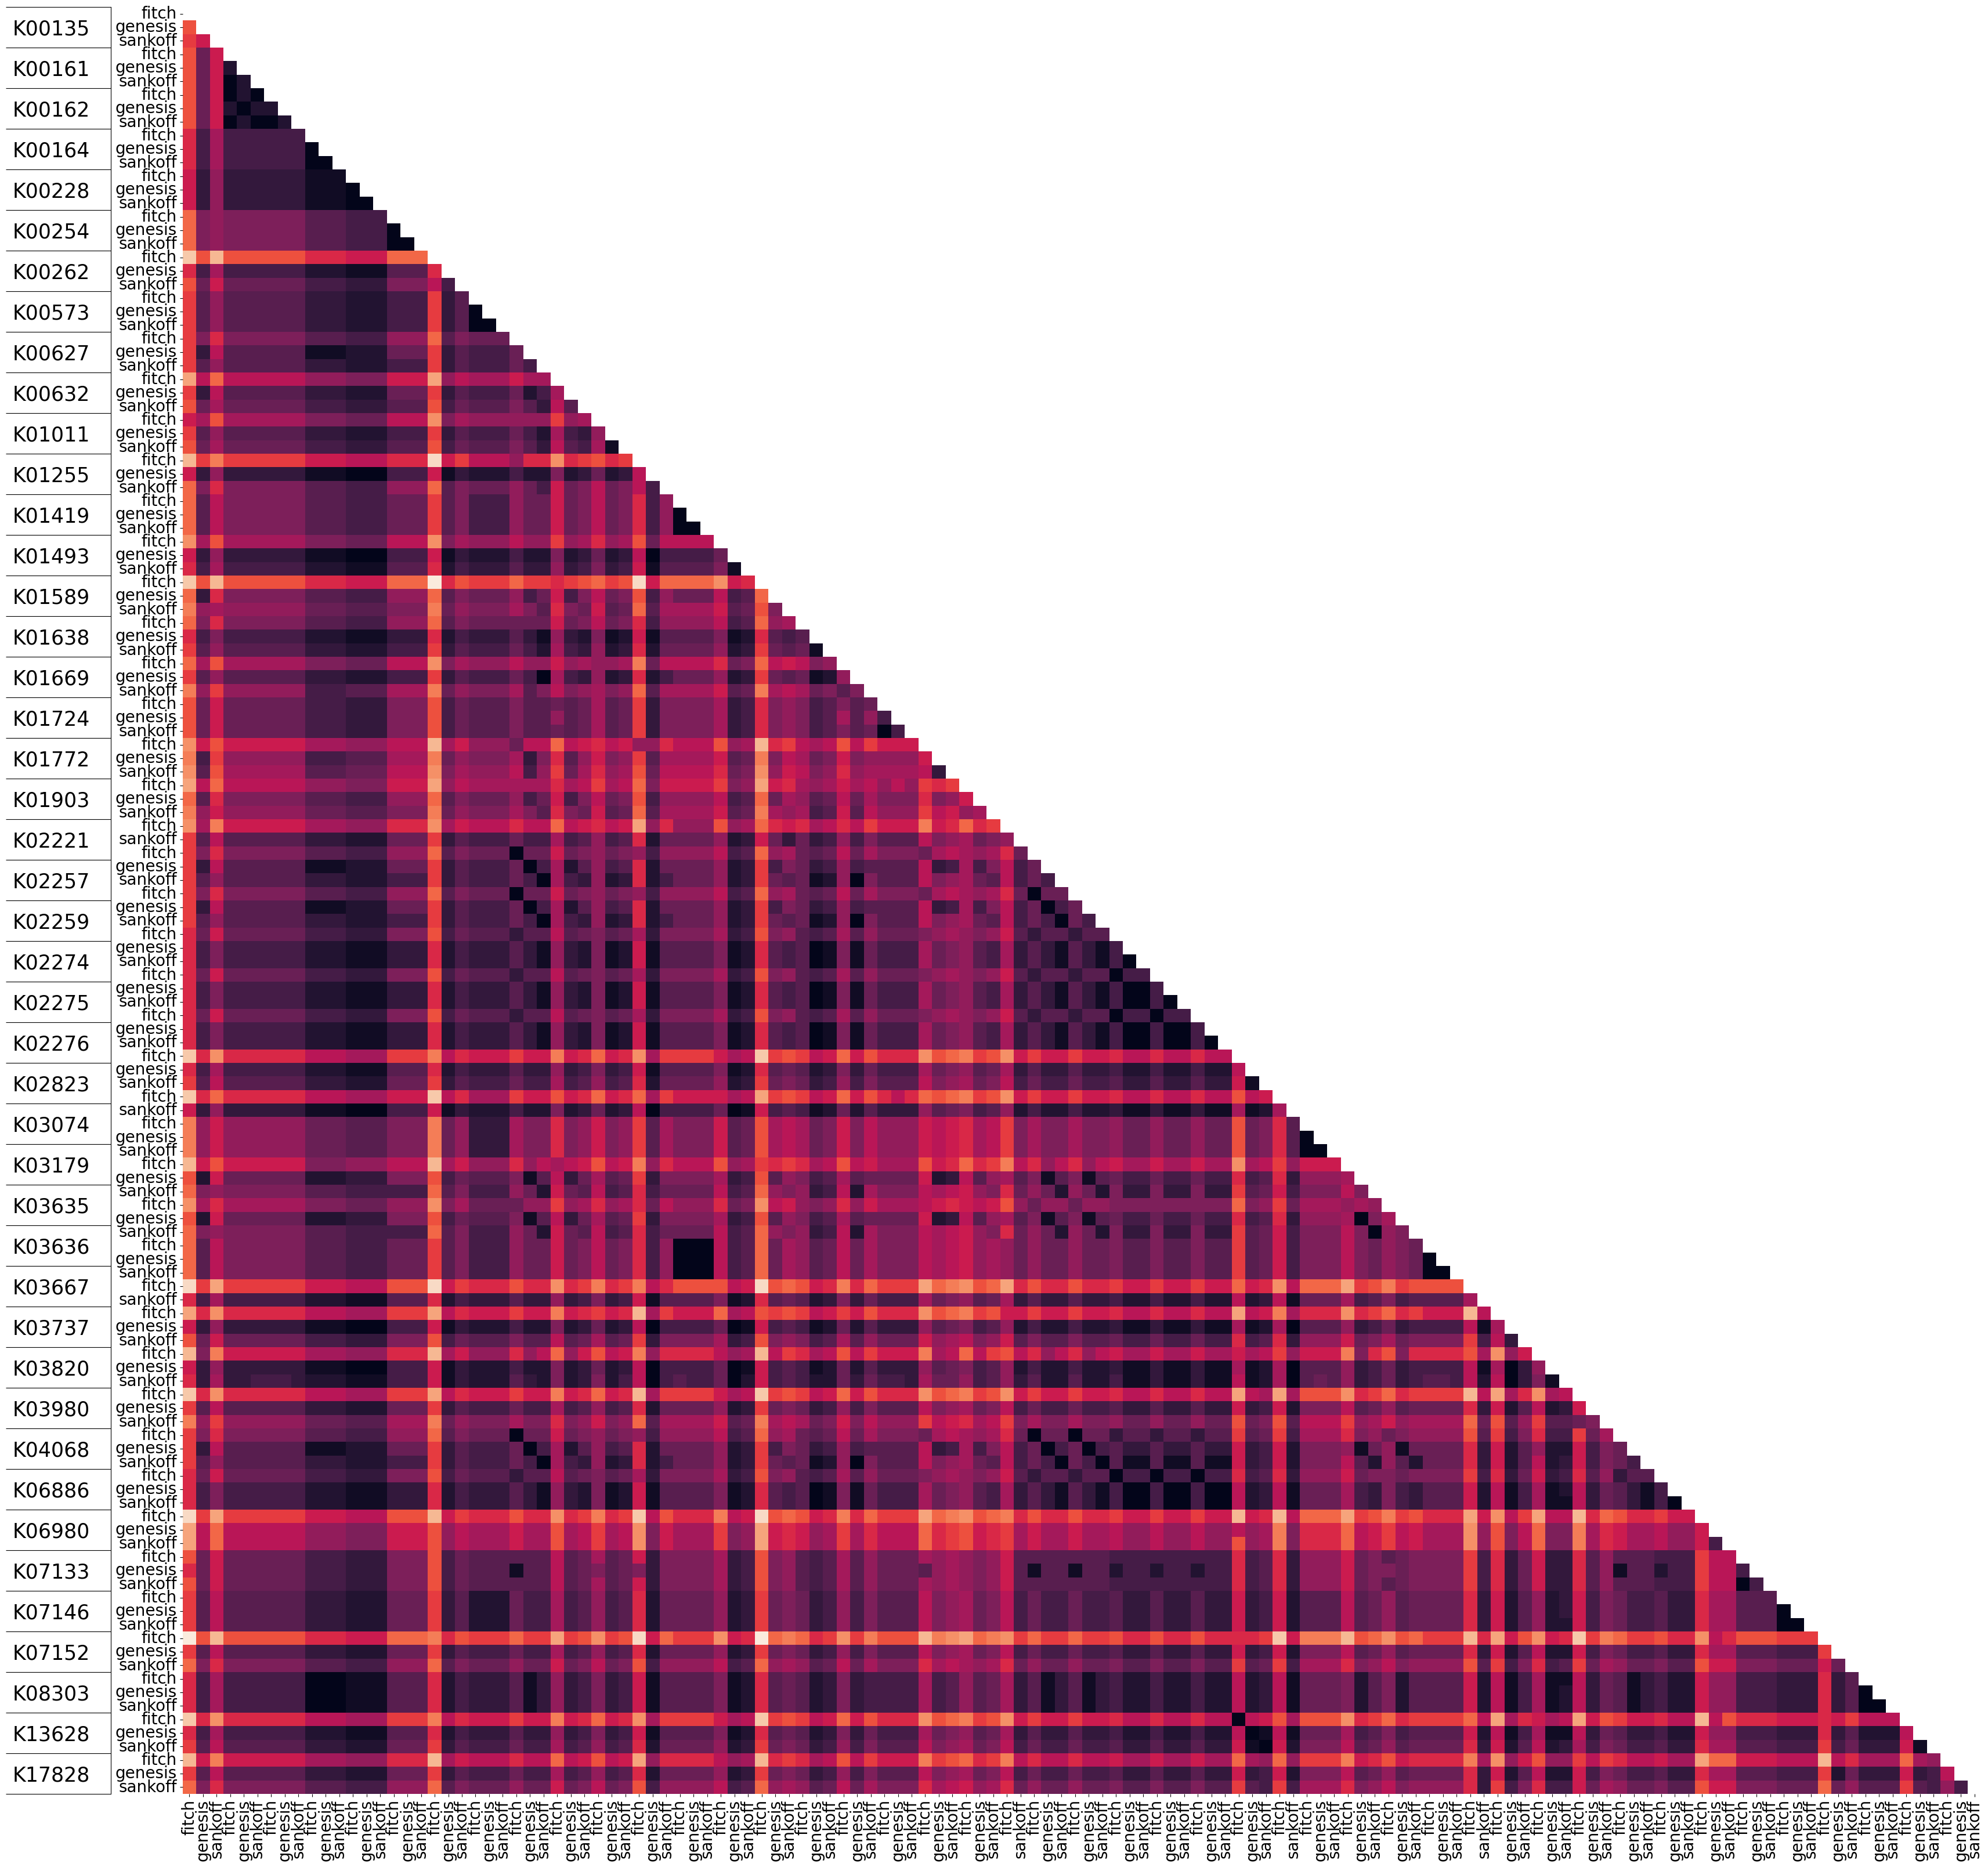

In [58]:
new_keys = [key.split("_")[0] for key in keys]
fig, ax = plt.subplots(figsize=(40,40))
mask = np.triu(np.ones_like(data, dtype=bool))
ax = sns.heatmap(data,xticklabels=new_keys,yticklabels=new_keys,cbar_kws={"label":"distance value"},mask=mask,cbar=False)
# Get the colorbar axes
cbar_axes = ax.figure.axes[-1]

sec = ax.secondary_yaxis(location=-.05)
sec.spines['left'].set_visible(False)
sec.set_yticks([3*i+1.5 for i in range(45)],labels=sorted(list(set([key.split("_")[1] for key in keys]))),fontsize=25)
sec.tick_params('y',length=0)

sec2 = ax.secondary_yaxis(location=-.04)
sec2.set_yticks([3*i for i in range(46)],labels=[])
sec2.tick_params('y',length=130)

#sec3 = ax.secondary_xaxis(location=-.06)
#sec3.spines['bottom'].set_visible(False)
#sec3.set_xticks([22,66,110],labels=['Fitch','Genesis','Sankoff'],fontsize=25)
#sec3.tick_params('x',length=0)

#sec4 = ax.secondary_xaxis(location=-.045)
#sec4.set_xticks([0,45,87,132],labels=[])
#sec4.tick_params('x',length=40)

# Set the font size for colorbar tick labels
cbar_axes.tick_params(labelsize=20)

# Set the font size for the colorbar label
cbar_axes.yaxis.label.set_size(20)
fig.savefig("figure_character_reconstruction2.pdf")

In [60]:
results_dict.keys()

dict_keys([('sankoff_K00262', 'sankoff_K00262'), ('sankoff_K00262', 'genesis_K00254'), ('sankoff_K00262', 'fitch_K01419'), ('sankoff_K00262', 'genesis_K01638'), ('sankoff_K00262', 'fitch_K02276'), ('sankoff_K00262', 'genesis_K00573'), ('sankoff_K00262', 'sankoff_K07146'), ('sankoff_K00262', 'fitch_K00262'), ('sankoff_K00262', 'fitch_K06980'), ('sankoff_K00262', 'genesis_K01419'), ('sankoff_K00262', 'sankoff_K03980'), ('sankoff_K00262', 'fitch_K01589'), ('sankoff_K00262', 'sankoff_K02275'), ('sankoff_K00262', 'sankoff_K06980'), ('sankoff_K00262', 'sankoff_K00164'), ('sankoff_K00262', 'fitch_K03636'), ('sankoff_K00262', 'fitch_K02257'), ('sankoff_K00262', 'sankoff_K21636'), ('sankoff_K00262', 'sankoff_K01638'), ('sankoff_K00262', 'sankoff_K01255'), ('sankoff_K00262', 'sankoff_K00228'), ('sankoff_K00262', 'sankoff_K02276'), ('sankoff_K00262', 'sankoff_K02823'), ('sankoff_K00262', 'genesis_K02276'), ('sankoff_K00262', 'fitch_K01669'), ('sankoff_K00262', 'sankoff_K01669'), ('sankoff_K00262'